In [1]:
from IPython.display import display, HTML
import numpy
import matplotlib
from matplotlib import pyplot
#import seaborn

In [2]:
from tokenise import tokenise

In [3]:
matplotlib.rcParams["figure.figsize"] = (10, 10)

In [4]:
def tsv_lines(text):
    return [line.split("\t") for line in text.splitlines()][1:]

In [5]:
def html_table_row(items):
    output = "<tr>"
    for item in items:
        output += f"<td>{item}</td>"
    output +="</tr>"
    return output

In [6]:
tsvDirectory = "transcripts/improved_tsv"

In [7]:
with open(f"{tsvDirectory}/episodes.tsv", "r", encoding="utf-8") as episodesTsvFile:
    episodesTsv = tsv_lines(episodesTsvFile.read())

speakerTokenCounts = []
speakerTokenCountsLookup = {}

for episode in episodesTsv:
    fileName = episode[2]
    with open(f"{tsvDirectory}/{fileName}", "r", encoding="utf-8") as episodeFile:
        lines = tsv_lines(episodeFile.read())
    
    for line in lines:
        speaker = line[0]
        text = line[1]
        if speaker in speakerTokenCountsLookup:
            speakerTokenCounts[speakerTokenCountsLookup[speaker]]["COUNT"] += len(tokenise(text))
        else:
            speakerTokenCountsLookup[speaker] = len(speakerTokenCounts)
            speakerTokenCounts.append({
                "SPEAKER": speaker,
                "COUNT": len(tokenise(text))
            })

speakerTokenCounts.sort(key=lambda x: -x["COUNT"])

In [8]:
output = "<b>Top fifteen</b><br /><table><tr><th>Speaker</th><th>Count</th></tr>"
for i in range(15):
    output += html_table_row([speakerTokenCounts[i]["SPEAKER"], speakerTokenCounts[i]["COUNT"]])
output += "</table>"
display(HTML(output))

Speaker,Count
Fry,39709
Bender,37789
Leela,32520
Professor Farnsworth,24461
Zoidberg,9381
Hermes,8117
Zapp Brannigan,7400
Amy,7213
Kif,2657
Mom,2554


In [9]:
totalTokens = 0
for speaker in speakerTokenCounts:
    totalTokens += speaker["COUNT"]
print(f"Total tokens: {totalTokens}")

Total tokens: 265897


In [10]:
output = "<b>Top fifteen (as percentages)</b><br /><table><tr><th>Speaker</th><th>Count</th></tr>"
for i in range(15):
    output += html_table_row([speakerTokenCounts[i]["SPEAKER"], str(round(speakerTokenCounts[i]["COUNT"] / totalTokens * 100, 3)) +" %"])
output += "</table>"
display(HTML(output))

Speaker,Count
Fry,14.934 %
Bender,14.212 %
Leela,12.23 %
Professor Farnsworth,9.199 %
Zoidberg,3.528 %
Hermes,3.053 %
Zapp Brannigan,2.783 %
Amy,2.713 %
Kif,0.999 %
Mom,0.961 %


In [11]:
pyplot.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 '_classic_test']

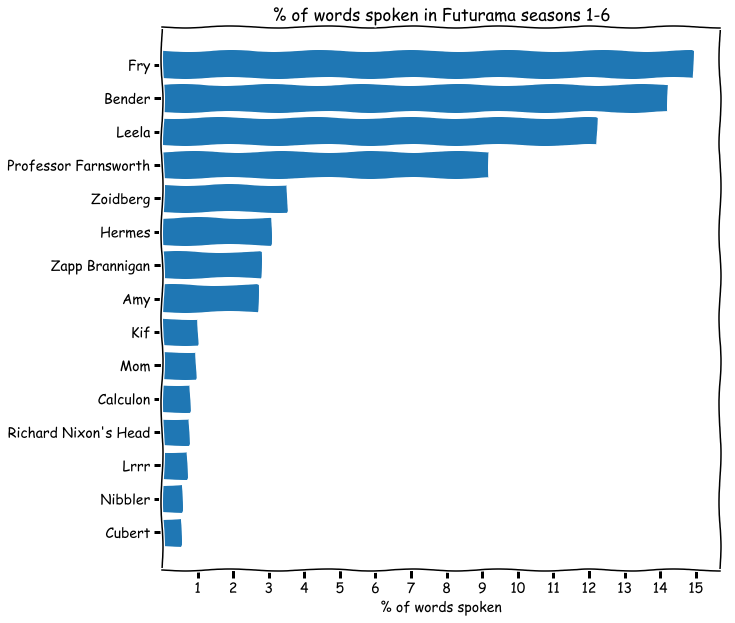

In [12]:
matplotlib.rcParams["figure.figsize"] = (10, 10)
#with pyplot.style.context(("seaborn-pastel")):
with pyplot.xkcd():
    percentages = [speakerTokenCounts[i]["COUNT"] / totalTokens * 100 for i in range(15)]
    names = [speakerTokenCounts[i]["SPEAKER"] for i in range(15)]
    pyplot.barh(list(reversed(range(len(names)))), percentages, tick_label=names)
    pyplot.xticks(list(range(1,16)))
    pyplot.title("% of words spoken in Futurama seasons 1-6")
    pyplot.xlabel("% of words spoken")
    pyplot.show()

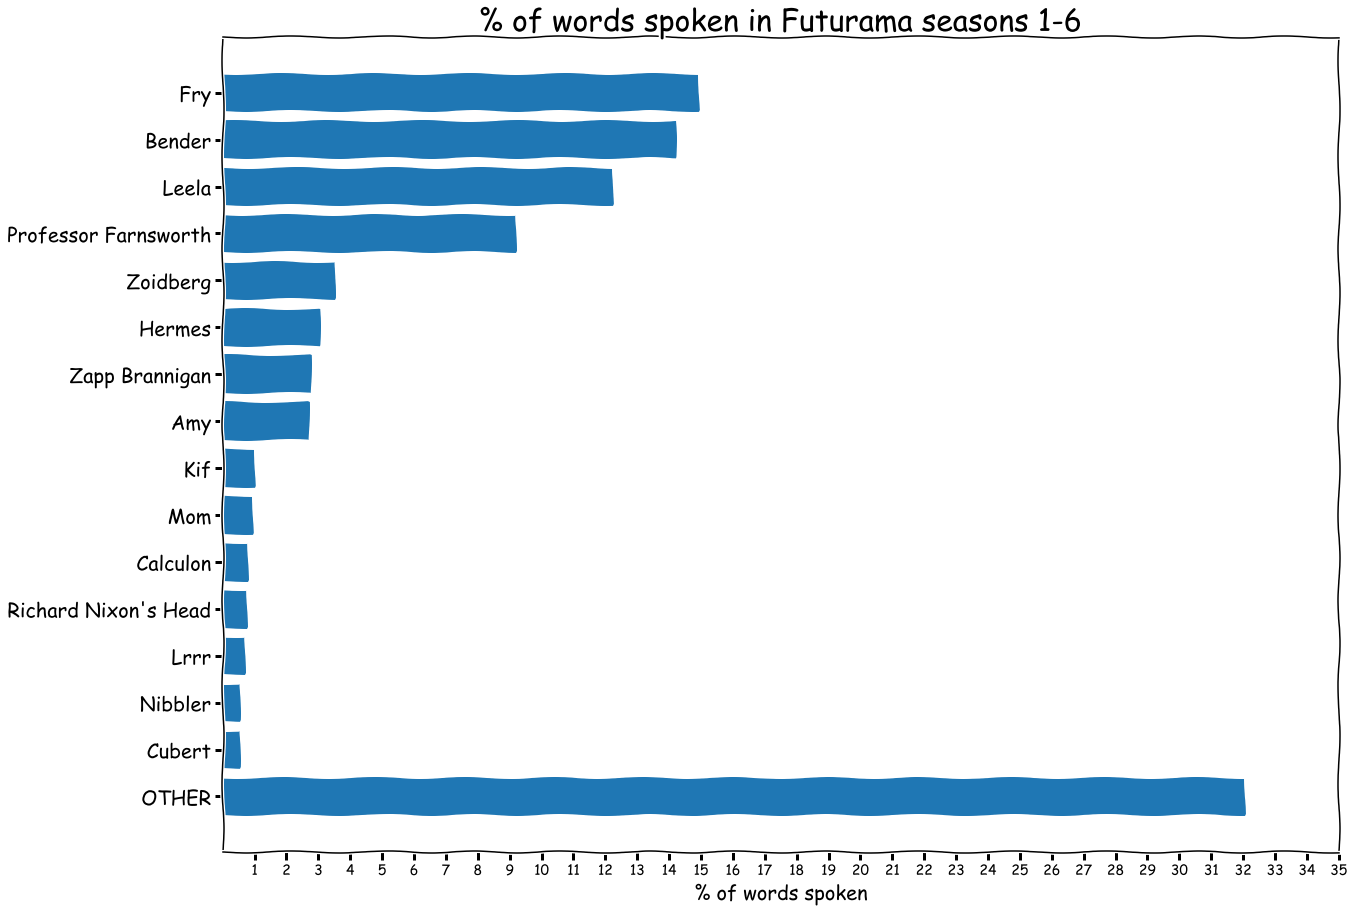

In [29]:
matplotlib.rcParams["figure.figsize"] = (20, 15)
other = 100 - sum(percentages)
with pyplot.xkcd():
    percentagesWithOther = list(percentages) + [other]
    namesWithOther = list(names) + ["OTHER"]
    pyplot.barh(list(reversed(range(len(namesWithOther)))), percentagesWithOther, tick_label=namesWithOther)
    pyplot.xticks(list(range(1,36)))
    pyplot.yticks(fontsize=20)
    pyplot.title("% of words spoken in Futurama seasons 1-6", fontsize=30)
    pyplot.xlabel("% of words spoken", fontsize=20)
    pyplot.show()

In [14]:
# https://github.com/DanielJohnBenton/AfinnLookup#acknowledgements
with open("misc_data/AFINN-111-DJB-amended.txt", "r", encoding="utf-8") as afinnFile:
    afinnData = [line.split("\t") for line in afinnFile.read().splitlines()]
    
afinnLookup = {line[0]: int(line[1]) for line in afinnData}

def afinn(word):
    global afinnLookup
    word = word.lower()
    if word in afinnLookup:
        return afinnLookup[word]
    return 0

print(afinn("Awful"))
print(afinn("wonderful"))
print(afinn("fsdfjl"))

-3
4
0
